# NNDL HW 1
Amir Mohammad Ranjbar Pazoki 810199340

## Problem 2 (Perceptron)
### Read data


In [3]:
import pandas as pd

perceptron_data = pd.read_csv('/content/perceptron.csv')
perceptron_data.head()

,x1,x2,y
0,1.028503,0.973218,-1.0
1,0.252505,0.955872,-1.0
2,1.508085,0.672058,-1.0
3,1.940002,1.721370,-1.0
4,-1.048819,-0.844999,1.0


### Split data to train and test

In [ ]:
from sklearn.model_selection import train_test_split

X = perceptron_data.iloc[:, :2]
y = perceptron_data.iloc[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Train X shape:{}".format(X_train.shape))
print("Train y shape:{}".format(y_train.shape))
print("Test X shape:{}".format(X_test.shape))
print("Test y shape:{}".format(y_test.shape))

Train X shape:(300, 2)
Train y shape:(300,)
Test X shape:(100, 2)
Test y shape:(100,)


### 2.a. Plot data

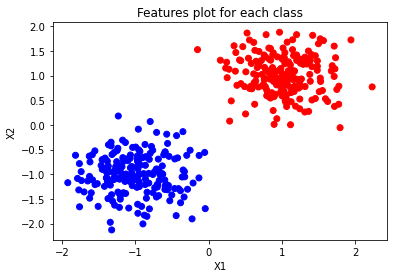

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

x1 = perceptron_data.iloc[:, 0]
x2 = perceptron_data.iloc[:, 1]
colors = ['red', 'blue']
plt.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Features plot for each class")
plt.show()

### 2.b. Nueron with perecptron learning rule

In [4]:
import numpy as np

class Nueron:
  def __init__(self, weights, bias, threshold = 0, error_threshold = 0,
               learning_rate = 0.01):
    self.inputs = []
    self.target = 0
    self.weights = weights
    self.bias = bias
    self.threshold = threshold
    self.error_threshold = error_threshold
    self.learning_rate = learning_rate
  
  def put_inputs(self, inputs, target=None):
    self.inputs = inputs
    self.target = target

  @property
  def net(self):
    return np.dot(self.inputs, self.weights) + self.bias

  @property
  def output(self):
    return self.activation_function(self.net)

  def train(self, X_train, y_train, num_of_epochs = 100):
    X_train = X_train.values
    y_train = y_train.values
    for epoch in range(num_of_epochs):
      error_count = 0
      for record_num, record in enumerate(X_train):
        target = y_train[record_num]
        self.put_inputs(np.array([record]), target)
        output = self.output
        error = sum(output - target)
        self.update_weights(error)
        if self.calculate_loss_function() > self.error_threshold:
          error_count += 1
      if error_count == 0:
        print("Training Finished at epoch number {}".format(epoch))
        break
      print("Epoch {} finished. Number of errors: {}".format(epoch, error_count))
    
  def predict(self, X_test):
    self.put_inputs(X_test)
    return self.output

class PerceptronNueron(Nueron):

  def update_weights(self, error):
    if error != 0:
      self.weights += (self.learning_rate * self.inputs * self.target)[0]
      self.bias += self.learning_rate * self.target

  def activation_function(self, net):
    outputs = np.zeros(net.shape[0])
    outputs[net > abs(self.threshold)] = 1
    outputs[net < -abs(self.threshold)] = -1
    return outputs

  def plot_seperator_line(self, X_test, y_test):
    x1 = X_test.iloc[:, 0]
    x2 = X_test.iloc[:, 1]
    colors = ['red', 'blue']
    plt.scatter(x1, x2, c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Data classes with seperator line for test data")

    x1_min = np.min(x1)
    x1_max = np.max(x1)
    x1s = np.array([x1_min, x1_max])
    w1 = self.weights[0]
    w2 = self.weights[1]
    x2s = (self.threshold - self.bias - w1 * x1s) / w2
    plt.plot(x1s, x2s, '-g')
    x2ss = (-self.threshold - self.bias - w1 * x1s) / w2
    plt.plot(x1s, x2ss, '-g')
    plt.show()

  def calculate_loss_function(self):
    return abs(self.target - self.output)[0]

### 2.c. Train perceptron nueron and evaluate test data

In [ ]:
from sklearn.metrics import accuracy_score

weights = np.zeros(2)
bias = 0
threshold = 0.001
perceptron_nueron = PerceptronNueron(weights, bias, threshold)
perceptron_nueron.train(X_train, y_train)
y_pred = perceptron_nueron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: {}%".format(accuracy * 100))

Training Finished at epoch number 0
Test accuracy: 100.0%


#### Plot seperator lines

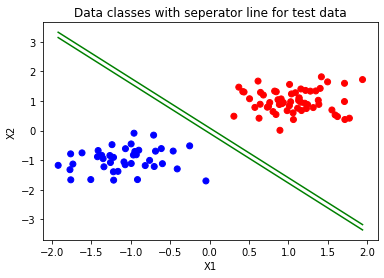

In [ ]:
perceptron_nueron.plot_seperator_line(X_test, y_test)

### 2.d. Changing thresholds and see results

Threshold: 0.1
Epoch 0 finished. Number of errors: 9
Epoch 1 finished. Number of errors: 3
Epoch 2 finished. Number of errors: 2
Epoch 3 finished. Number of errors: 2
Epoch 4 finished. Number of errors: 1
Epoch 5 finished. Number of errors: 1
Epoch 6 finished. Number of errors: 1
Epoch 7 finished. Number of errors: 1
Epoch 8 finished. Number of errors: 1
Epoch 9 finished. Number of errors: 1
Epoch 10 finished. Number of errors: 1
Epoch 11 finished. Number of errors: 1
Epoch 12 finished. Number of errors: 1
Epoch 13 finished. Number of errors: 1
Epoch 14 finished. Number of errors: 1
Epoch 15 finished. Number of errors: 1
Epoch 16 finished. Number of errors: 1
Epoch 17 finished. Number of errors: 1
Training Finished at epoch number 18
Test accuracy: 100.0%


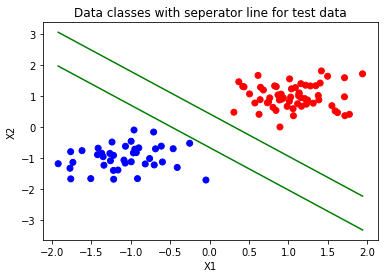

Threshold: 0.5
Epoch 0 finished. Number of errors: 31
Epoch 1 finished. Number of errors: 10
Epoch 2 finished. Number of errors: 8
Epoch 3 finished. Number of errors: 6
Epoch 4 finished. Number of errors: 5
Epoch 5 finished. Number of errors: 4
Epoch 6 finished. Number of errors: 4
Epoch 7 finished. Number of errors: 4
Epoch 8 finished. Number of errors: 4
Epoch 9 finished. Number of errors: 4
Epoch 10 finished. Number of errors: 4
Epoch 11 finished. Number of errors: 4
Epoch 12 finished. Number of errors: 4
Epoch 13 finished. Number of errors: 3
Epoch 14 finished. Number of errors: 3
Epoch 15 finished. Number of errors: 3
Epoch 16 finished. Number of errors: 3
Epoch 17 finished. Number of errors: 3
Epoch 18 finished. Number of errors: 3
Epoch 19 finished. Number of errors: 3
Epoch 20 finished. Number of errors: 3
Epoch 21 finished. Number of errors: 3
Epoch 22 finished. Number of errors: 3
Epoch 23 finished. Number of errors: 3
Epoch 24 finished. Number of errors: 2
Epoch 25 finished.

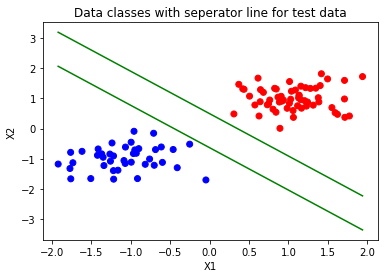

In [ ]:
threshold = 0.1
print("Threshold: {}".format(threshold))
perceptron_nueron = PerceptronNueron(weights, bias, threshold)
perceptron_nueron.train(X_train, y_train)
y_pred = perceptron_nueron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: {}%".format(accuracy * 100))
perceptron_nueron.plot_seperator_line(X_test, y_test)

threshold = 0.5
print("Threshold: {}".format(threshold))
perceptron_nueron = PerceptronNueron(weights, bias, threshold)
perceptron_nueron.train(X_train, y_train)
y_pred = perceptron_nueron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: {}%".format(accuracy * 100))
perceptron_nueron.plot_seperator_line(X_test, y_test)

Threshold: 0
Training Finished at epoch number 0
Test accuracy: 100.0%


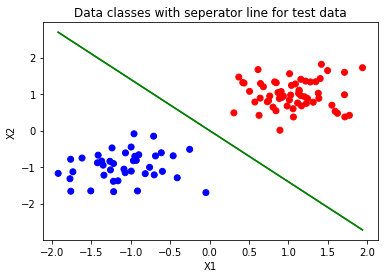

In [ ]:
threshold = 0
print("Threshold: {}".format(threshold))
perceptron_nueron = PerceptronNueron(weights, bias, threshold)
perceptron_nueron.train(X_train, y_train)
y_pred = perceptron_nueron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: {}%".format(accuracy * 100))
perceptron_nueron.plot_seperator_line(X_test, y_test)

## Problem 3 (Adaline)
### Generate data

In [ ]:
case_1_class_1_x1 = np.random.normal(loc=1, scale=0.5, size=1000)
case_1_class_1_x2 = np.random.normal(loc=1, scale=0.5, size=1000)
case_1_class_1_y = np.ones(1000)
case1_class1 = pd.DataFrame({'x1': case_1_class_1_x1, 'x2': case_1_class_1_x2, 
                             'y': case_1_class_1_y})
case_1_class_2_x1 = np.random.normal(loc=-1, scale=0.5, size=10)
case_1_class_2_x2 = np.random.normal(loc=-1, scale=0.5, size=10)
case_1_class2_y = -np.ones(10)
case1_class2 = pd.DataFrame({'x1': case_1_class_2_x1, 'x2': case_1_class_2_x2, 
                             'y': case_1_class2_y})
case1_data = pd.concat([case1_class1, case1_class2])

case_2_class_1_x1 = np.random.normal(loc=1, scale=0.5, size=100)
case_2_class_1_x2 = np.random.normal(loc=1, scale=0.5, size=100)
case_2_class_1_y = np.ones(100)
case2_class1 = pd.DataFrame({'x1': case_2_class_1_x1, 'x2': case_2_class_1_x2, 
                             'y': case_2_class_1_y})
case_2_class_2_x1 = np.random.normal(loc=-1, scale=0.5, size=100)
case_2_class_2_x2 = np.random.normal(loc=-1, scale=0.5, size=100)
case_2_class2_y = -np.ones(100)
case2_class2 = pd.DataFrame({'x1': case_2_class_2_x1, 'x2': case_2_class_2_x2, 
                             'y': case_2_class2_y})
case2_data = pd.concat([case2_class1, case2_class2])

print(case1_data.head())
print(case2_data.head())

         x1        x2    y
0  1.619121  1.256790  1.0
1  1.018855  0.730817  1.0
2  0.631953  0.267981  1.0
3  0.939007  1.134947  1.0
4  0.203968  1.499162  1.0
         x1        x2    y
0  0.240513  0.361101  1.0
1  0.955157  2.028466  1.0
2  1.855931  0.807130  1.0
3  1.410213  0.776815  1.0
4  0.396990  0.337086  1.0


### Define AdaLine Nueron

In [5]:
class AdaLineNueron(Nueron):

  def update_weights(self, error):
      self.weights += (self.learning_rate * self.inputs * (self.target - self.net))[0]
      self.bias += self.learning_rate * (self.target - self.net)

  def activation_function(self, net):
      outputs = np.zeros(net.shape[0])
      outputs[net >= 0] = 1
      outputs[net < 0] = -1
      return outputs

  def plot_seperator_line(self, X_test, y_test):
    x1 = X_test.iloc[:, 0]
    x2 = X_test.iloc[:, 1]
    colors = ['red', 'blue']
    plt.scatter(x1, x2, c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Data classes with seperator line for test data")

    x1_min = np.min(x1)
    x1_max = np.max(x1)
    x1s = np.array([x1_min, x1_max])
    w1 = self.weights[0]
    w2 = self.weights[1]
    x2s = (- self.bias - w1 * x1s) / w2
    plt.plot(x1s, x2s, '-g')
    plt.show()

  def calculate_loss_function(self):
    return (0.5 * ((self.target - self.net) ** 2))[0]


* Case 1

Epoch 0 finished. Number of errors: 33
Epoch 1 finished. Number of errors: 11
Epoch 2 finished. Number of errors: 10
Epoch 3 finished. Number of errors: 10
Epoch 4 finished. Number of errors: 11
Epoch 5 finished. Number of errors: 11
Epoch 6 finished. Number of errors: 11
Epoch 7 finished. Number of errors: 11
Epoch 8 finished. Number of errors: 11
Epoch 9 finished. Number of errors: 11
Epoch 10 finished. Number of errors: 11
Epoch 11 finished. Number of errors: 11
Epoch 12 finished. Number of errors: 11
Epoch 13 finished. Number of errors: 11
Epoch 14 finished. Number of errors: 11
Epoch 15 finished. Number of errors: 11
Epoch 16 finished. Number of errors: 11
Epoch 17 finished. Number of errors: 11
Epoch 18 finished. Number of errors: 11
Epoch 19 finished. Number of errors: 11
Epoch 20 finished. Number of errors: 11
Epoch 21 finished. Number of errors: 11
Epoch 22 finished. Number of errors: 11
Epoch 23 finished. Number of errors: 11
Epoch 24 finished. Number of errors: 11
Epoch 25 f

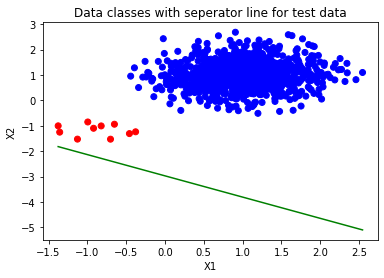

In [ ]:
weights = np.random.random(2)
bias = np.random.random()
adaline_nueron = AdaLineNueron(weights=weights, bias=bias, error_threshold=0.05)
X = case1_data.iloc[:, :2]
y = case1_data.iloc[:, 2]
adaline_nueron.train(X, y)
y_pred = adaline_nueron.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Test accuracy: {}%".format(accuracy * 100))
adaline_nueron.plot_seperator_line(X, y)

* Case 2

Epoch 0 finished. Number of errors: 93
Epoch 1 finished. Number of errors: 72
Epoch 2 finished. Number of errors: 56
Epoch 3 finished. Number of errors: 54
Epoch 4 finished. Number of errors: 53
Epoch 5 finished. Number of errors: 49
Epoch 6 finished. Number of errors: 48
Epoch 7 finished. Number of errors: 48
Epoch 8 finished. Number of errors: 48
Epoch 9 finished. Number of errors: 48
Epoch 10 finished. Number of errors: 48
Epoch 11 finished. Number of errors: 48
Epoch 12 finished. Number of errors: 48
Epoch 13 finished. Number of errors: 48
Epoch 14 finished. Number of errors: 48
Epoch 15 finished. Number of errors: 48
Epoch 16 finished. Number of errors: 48
Epoch 17 finished. Number of errors: 48
Epoch 18 finished. Number of errors: 48
Epoch 19 finished. Number of errors: 48
Epoch 20 finished. Number of errors: 48
Epoch 21 finished. Number of errors: 48
Epoch 22 finished. Number of errors: 48
Epoch 23 finished. Number of errors: 48
Epoch 24 finished. Number of errors: 48
Epoch 25 f

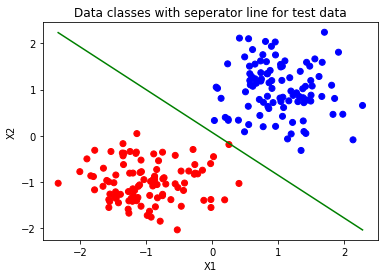

In [ ]:
weights = np.random.random(2)
bias = np.random.random()
adaline_nueron = AdaLineNueron(weights=weights, bias=bias, error_threshold=0.05)
X = case2_data.iloc[:, :2]
y = case2_data.iloc[:, 2]
adaline_nueron.train(X, y)
y_pred = adaline_nueron.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Test accuracy: {}%".format(accuracy * 100))
adaline_nueron.plot_seperator_line(X, y)

## Problem 4 (MAdaLine)
### Read Data

In [6]:
madaline_data = pd.read_csv('/content/madaline.csv', header= None)
madaline_data.iloc[:, 2].replace({0.0: -1.0}, inplace=True)
madaline_data.head()

,0,1,2
0,0.459694,-0.470583,-1.0
1,0.797385,-0.343030,-1.0
2,0.235270,0.961296,-1.0
3,0.765453,-0.177644,-1.0
4,-0.335577,-0.313893,-1.0


### Split X and y

In [7]:
X = madaline_data.iloc[:, :2]
y = madaline_data.iloc[:, 2]

print(X.shape)
print(y.shape)

(200, 2)
(200,)


### Define MAdaLine Network

In [22]:
from sklearn.metrics import accuracy_score

class MAdaLineNet(AdaLineNueron):

  def __init__(self, hidden_weights, hidden_bias, output_weights, output_bias):
    super().__init__(weights=hidden_weights, bias=hidden_bias)
    self.output_weights = output_weights
    self.output_bias = output_bias
    self.previous_hidden_weights = []
    self.previous_hidden_bias = []

  @property
  def net(self):
    self.z_in = np.dot(self.weights, self.inputs.T) + self.bias
    self.z = self.activation_function(self.z_in)
    return np.dot(self.output_weights.T, self.z) + self.output_bias

  @property
  def output(self):
    return self.activation_function(self.net)

  def train(self, X_train, y_train, num_of_epochs = 100):
    X_train = X_train.values
    y_train = y_train.values
    for epoch in range(num_of_epochs):
      error_count = 0
      for record_num, record in enumerate(X_train):
        target = y_train[record_num]
        self.put_inputs(np.array([record]), target)
        output = self.output
        if output != target:
          error_count += 1
          self.update_weights()
      if self.test_stop_condition() or error_count == 0:
        print("Training Finished at epoch number {}".format(epoch))
        break
      print("Epoch {} finished. Number of errors: {}".format(epoch, error_count))
    
  def predict(self, X_test):
    self.put_inputs(X_test)
    return self.output

  def update_weights(self):
    self.previous_hidden_weights = np.copy(self.weights)
    self.previous_hidden_bias = np.copy(self.bias)
    if self.target == 1:
      net_input_values = abs(self.z_in)
      j = np.argmin(net_input_values)
      self.weights[j] += (self.learning_rate * self.inputs.T * (1 - self.z_in[j])).T[0]
      self.bias[j] += (self.learning_rate * (1 - self.z_in[j]))
    elif self.target == -1:
      for k, net_input in enumerate(self.z_in):
        if net_input <= 0:
          continue
        self.weights[k] += (self.learning_rate * self.inputs.T * (-1 - self.z_in[k])).T[0]
        self.bias[k] += (self.learning_rate * (-1 - self.z_in[k]))

  def activation_function(self, net):
    outputs = np.zeros(net.shape)
    outputs[net > abs(self.threshold)] = 1
    outputs[net < -abs(self.threshold)] = -1
    return outputs

  def test_stop_condition(self):
    return (abs(self.weights - self.previous_hidden_weights)<0.01).all() and \
           (abs(self.bias - self.previous_hidden_bias)<0.01).all()

  def plot_seperator_polygon(self, X_test, y_test):
    x1 = X_test.iloc[:, 0]
    x2 = X_test.iloc[:, 1]
    colors = ['red', 'blue']
    plt.scatter(x1, x2, c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Data classes with seperator polygon")

    x1_min = np.min(x1)
    x1_max = np.max(x1)
    x1s = np.array([x1_min, x1_max])
    for j, weight in enumerate(self.weights):
      w1 = weight[0]
      w2 = weight[1]
      x2s = (-self.bias[j] - w1 * x1s) / w2
      plt.plot(x1s, x2s, '-g')
    plt.show()

### Train & Test MAdaLine with 4 AdaLine Nuerons

Epoch 0 finished. Number of errors: 24
Epoch 1 finished. Number of errors: 7
Epoch 2 finished. Number of errors: 5
Epoch 3 finished. Number of errors: 4
Epoch 4 finished. Number of errors: 7
Epoch 5 finished. Number of errors: 6
Epoch 6 finished. Number of errors: 4
Epoch 7 finished. Number of errors: 4
Epoch 8 finished. Number of errors: 4
Epoch 9 finished. Number of errors: 6
Epoch 10 finished. Number of errors: 6
Epoch 11 finished. Number of errors: 8
Epoch 12 finished. Number of errors: 6
Epoch 13 finished. Number of errors: 5
Epoch 14 finished. Number of errors: 5
Epoch 15 finished. Number of errors: 4
Epoch 16 finished. Number of errors: 3
Epoch 17 finished. Number of errors: 2
Epoch 18 finished. Number of errors: 2
Epoch 19 finished. Number of errors: 3
Epoch 20 finished. Number of errors: 2
Epoch 21 finished. Number of errors: 2
Epoch 22 finished. Number of errors: 2
Epoch 23 finished. Number of errors: 2
Epoch 24 finished. Number of errors: 2
Epoch 25 finished. Number of error

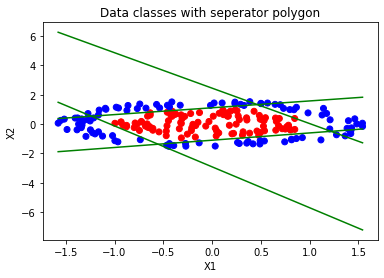

In [30]:
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(100) 
hidden_weights = np.array([np.random.uniform(-0.1, 0.1, size=2) for _ in range(4)])
hidden_bias = np.array([[np.random.uniform(-0.1, 0.1)] for _ in range(4)])
output_weights = np.array([0.25 for _ in range(4)])
output_bias = np.array(0.75)
madaline_net_4 = MAdaLineNet(hidden_weights, hidden_bias, output_weights, output_bias)
madaline_net_4.train(X, y)
y_pred = madaline_net_4.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Test accuracy: {}%".format(accuracy * 100))
madaline_net_4.plot_seperator_polygon(X, y)

### Train & Test MAdaLine with 6 AdaLine Nuerons

Epoch 0 finished. Number of errors: 23
Epoch 1 finished. Number of errors: 2
Epoch 2 finished. Number of errors: 2
Epoch 3 finished. Number of errors: 1
Training Finished at epoch number 4
Test accuracy: 100.0%


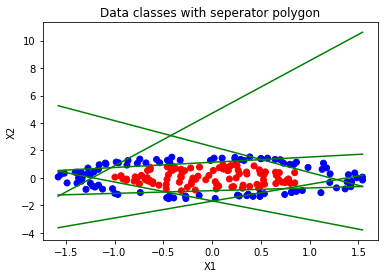

In [31]:
np.random.seed(100)
hidden_weights = np.array([np.random.uniform(-0.1, 0.1, size=2) for _ in range(6)])
hidden_bias = np.array([[np.random.uniform(-0.1, 0.1)] for _ in range(6)])
output_weights = np.array([1/6 for _ in range(6)])
output_bias = np.array(5/6)
madaline_net_6 = MAdaLineNet(hidden_weights, hidden_bias, output_weights, output_bias)
madaline_net_6.train(X, y)
y_pred = madaline_net_6.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Test accuracy: {}%".format(accuracy * 100))
madaline_net_6.plot_seperator_polygon(X, y)

### Train & Test MAdaLine with 8 AdaLine Nuerons

Epoch 0 finished. Number of errors: 26
Epoch 1 finished. Number of errors: 4
Epoch 2 finished. Number of errors: 3
Epoch 3 finished. Number of errors: 3
Epoch 4 finished. Number of errors: 1
Training Finished at epoch number 5
Test accuracy: 100.0%


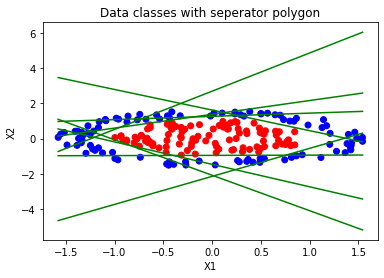

In [32]:
np.random.seed(100)
hidden_weights = np.array([np.random.uniform(-0.1, 0.1, size=2) for _ in range(8)])
hidden_bias = np.array([[np.random.uniform(-0.1, 0.1)] for _ in range(8)])
output_weights = np.array([0.125 for _ in range(8)])
output_bias = np.array(0.875)
madaline_net_8 = MAdaLineNet(hidden_weights, hidden_bias, output_weights, output_bias)
madaline_net_8.train(X, y)
y_pred = madaline_net_8.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Test accuracy: {}%".format(accuracy * 100))
madaline_net_8.plot_seperator_polygon(X, y)